In [11]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [2]:
#After running this, can calculate heritability with gcta
#i.e. GREML: gcta --grm adni_bed --pheno lh_caudalmiddlefrontal_thickness.phen --covar sex.covar --qcovar age.qcovar --reml --out adni_bed_lh_caudalmiddlefrontal_thickness --thread-num 10
# or HE Regression: gcta --HEreg --grm adni_bed --covar sex.covar --qcovar age.qcovar --pheno rh_caudalmiddlefrontal_thickness.phen --out adni_bed_rh_caudalmiddlefrontal_thickness



## File structure for heritability data

```
phen_dir
│   original heritability analysis (independent of cell-type/chromosome)
│   bed/bim/fam
│   phenotype file
│   covar, qcovar files
│
└───celltype_subdir
│   │   heritability analysis by cell-type
│   │   
│   │
│   └───chromosome_subdir
│       │   heritability analysis by cell-type and chromosome
│       │ 
│       │   
│   
└───chromosome_subdir
    │   heritability analysis by chromosome
    │   
```

### Combine harmonized data with the covariates and get 1 measurement per subject

In [3]:
harmonized=pd.read_csv('harmonized_imaging_data.csv')
# harmonized

In [4]:
with_age_sex=pd.read_csv('imaging_features_for_longcomb.csv')
# with_age_sex

In [5]:
combined = harmonized.merge(with_age_sex[['Subject', 'Acq_Date', 'Age', 'Sex']], 
                            on=['Subject', 'Acq_Date'], how="inner")
# combined

In [6]:
list(combined.columns)

['Unnamed: 0',
 'Subject',
 'Image_Data_ID',
 'Acq_Date',
 'Scanner_Proxy',
 'lh_bankssts_thickness',
 'lh_caudalanteriorcingulate_thickness',
 'lh_caudalmiddlefrontal_thickness',
 'lh_cuneus_thickness',
 'lh_entorhinal_thickness',
 'lh_fusiform_thickness',
 'lh_inferiorparietal_thickness',
 'lh_inferiortemporal_thickness',
 'lh_isthmuscingulate_thickness',
 'lh_lateraloccipital_thickness',
 'lh_lateralorbitofrontal_thickness',
 'lh_lingual_thickness',
 'lh_medialorbitofrontal_thickness',
 'lh_middletemporal_thickness',
 'lh_parahippocampal_thickness',
 'lh_paracentral_thickness',
 'lh_parsopercularis_thickness',
 'lh_parsorbitalis_thickness',
 'lh_parstriangularis_thickness',
 'lh_pericalcarine_thickness',
 'lh_postcentral_thickness',
 'lh_posteriorcingulate_thickness',
 'lh_precentral_thickness',
 'lh_precuneus_thickness',
 'lh_rostralanteriorcingulate_thickness',
 'lh_rostralmiddlefrontal_thickness',
 'lh_superiorfrontal_thickness',
 'lh_superiorparietal_thickness',
 'lh_superiortem

In [7]:
combined_no_duplicates = combined.drop_duplicates('Subject', keep = 'first')
# combined_no_duplicates

### Make .phen (phenotype files)

In [8]:
imaging_features = list(combined.columns)[5:-2]

In [9]:
# phen_cols = ['Left_Hippocampus', 'Right_Hippocampus',
#             'lh_caudalmiddlefrontal_thickness', 'rh_caudalmiddlefrontal_thickness',
#             'BrainSegVol', 'TotalGrayVol',
#             'Left_Amygdala', 'Right_Amygdala',
#             'rh_entorhinal_thickness', 'lh_entorhinal_thickness'] #columns used for heritability analysis
phen_cols = imaging_features

In [10]:
# [x[0] for x in combined[['Subject']].to_numpy()]
family = ['FAM_' + x[0:3] for x in combined_no_duplicates['Subject']]
subj = ['S_' + x[6:10] for x in combined_no_duplicates['Subject']]
lh_hippo = combined_no_duplicates['Left_Hippocampus']
sex = combined_no_duplicates['Sex']
age = combined_no_duplicates['Age']
lh_hippo

0       2847.898478
5       3252.031631
10      2846.158120
16      3256.356285
22      3373.766811
           ...     
3304    2334.534264
3305    2020.935749
3306    2321.342493
3307    2565.939953
3308    2126.464874
Name: Left_Hippocampus, Length: 809, dtype: float64

In [11]:
print(family[:4], subj[:4])

['FAM_941', 'FAM_941', 'FAM_137', 'FAM_137'] ['S_1202', 'S_1194', 'S_1414', 'S_0994']


In [12]:
for col in phen_cols:
    df = pd.DataFrame(data = {'fam': family, 'subj': subj, col: combined_no_duplicates[col]})
    df.to_csv("/Users/maxreynolds/Desktop/KayhanLab/Adni/Heritability_Analysis/{}.phen".format(col), sep = ' ', header = False, index = False)

In [13]:
# lh_caudalmiddlefrontal_thickness = pd.DataFrame(data = {'fam': family, 'subj': subj, 'lh_caudalmiddlefrontal_thickness': combined_no_duplicates['lh_caudalmiddlefrontal_thickness']})
# lh_caudalmiddlefrontal_thickness

In [14]:
# lh_caudalmiddlefrontal_thickness.to_csv('/Users/maxreynolds/Desktop/KayhanLab/Adni/Heritability_Analysis/lh_caudalmiddlefrontal_thickness.phen', sep = ' ', header = False, index = False)


### Make .covar (covariates)

In [28]:
covar = pd.DataFrame(data = {'fam': family, 'subj': subj, 'Sex': sex})
covar

,fam,subj,Sex
0,FAM_941,S_1202,M
5,FAM_941,S_1194,M
10,FAM_137,S_1414,M
16,FAM_137,S_0994,F
22,FAM_137,S_0972,M
...,...,...,...
3304,FAM_003,S_1074,F
3305,FAM_003,S_1059,F
3306,FAM_003,S_1021,F
3307,FAM_003,S_0931,F


In [29]:
covar.to_csv('/Users/maxreynolds/Desktop/KayhanLab/Adni/Heritability_Analysis/sex.covar', sep = ' ', header = False, index = False)

### Make .qcovar (quantitative covariates)

In [30]:
qcovar = pd.DataFrame(data = {'fam': family, 'subj': subj, 'Sex': age})
qcovar

,fam,subj,Sex
0,FAM_941,S_1202,79
5,FAM_941,S_1194,85
10,FAM_137,S_1414,78
16,FAM_137,S_0994,57
22,FAM_137,S_0972,78
...,...,...,...
3304,FAM_003,S_1074,85
3305,FAM_003,S_1059,85
3306,FAM_003,S_1021,87
3307,FAM_003,S_0931,86


In [31]:
qcovar.to_csv('/Users/maxreynolds/Desktop/KayhanLab/Adni/Heritability_Analysis/age.qcovar', sep = ' ', header = False, index = False)

### Run GCTA for every imaging feature

In [15]:
gcta_path = "/Users/maxreynolds/Desktop/KayhanLab/programs/gcta_1.93.2beta_mac/gcta64"
phen_dir = "/Users/maxreynolds/Desktop/KayhanLab/Adni/Heritability_Analysis"

In [71]:
for i_feature in imaging_features:
    os.system(gcta_path +  
          " --grm {} --pheno {} --covar {} --qcovar {} --reml --out {} --thread-num 10".format(
              os.path.join(phen_dir, 'adni_bed'),
              os.path.join(phen_dir,  i_feature+'.phen'),
              os.path.join(phen_dir, 'sex.covar'),
              os.path.join(phen_dir, 'age.qcovar'),
              os.path.join(phen_dir, 'adni_bed_'+i_feature)
          ))





### Parse Logs

In [16]:
df_heritability = pd.DataFrame(index=['VG/VP','SE'], columns = imaging_features)
df_heritability

,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,lh_fusiform_thickness,lh_inferiorparietal_thickness,lh_inferiortemporal_thickness,lh_isthmuscingulate_thickness,lh_lateraloccipital_thickness,...,lhCortexVol,rhCortexVol,CortexVol,lhCerebralWhiteMatterVol,rhCerebralWhiteMatterVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,SupraTentorialVol,SupraTentorialVolNotVent
VG/VP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
for i in imaging_features:
    with open(os.path.join(phen_dir, 'adni_bed_'+i+'.log')) as f:
        lines = f.readlines()
        loi = [l for l in lines if 'V(G)/Vp' in l][0]
        cols = loi.split('\t')
        df_heritability[i] = [float(cols[1]),float(cols[2])]

In [18]:
df_heritability

,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,lh_fusiform_thickness,lh_inferiorparietal_thickness,lh_inferiortemporal_thickness,lh_isthmuscingulate_thickness,lh_lateraloccipital_thickness,...,lhCortexVol,rhCortexVol,CortexVol,lhCerebralWhiteMatterVol,rhCerebralWhiteMatterVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,SupraTentorialVol,SupraTentorialVolNotVent
VG/VP,0.041216,0.000001,0.037628,0.080676,0.000001,0.000001,0.000001,0.020914,0.000001,0.060459,...,0.541322,0.600948,0.599109,0.223660,0.252441,0.255911,0.000001,0.549998,0.756653,0.680509
SE,0.172071,0.293184,0.124535,0.232631,0.226294,0.097228,0.125042,0.104831,0.274706,0.125646,...,0.344180,0.363490,0.357805,0.242818,0.270237,0.263713,0.172969,0.342992,0.378385,0.378104


In [19]:
df_heritability.to_csv('heritability_scores.csv')

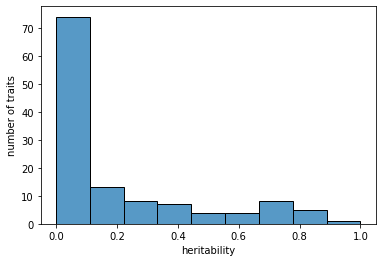

In [20]:
sns.histplot(df_heritability.values[0])
plt.xlabel('heritability')
plt.ylabel('number of traits')
plt.show()

### By Chromosome

In [21]:
n_chromosomes = 22
chromosome_subdir = 'by_chromosome'

In [90]:
#Make GRM for each chromosome
for i in range(1, n_chromosomes+1):
    print('Making GRM for chr' + str(i))
    os.system(gcta_path + " --bfile {} --chr {} --maf .01 --make-grm --out {} --thread-num 10".format(
              os.path.join(phen_dir, 'adni_bed'),
              i,
              os.path.join(phen_dir, chromosome_subdir, 'adni_bed_chr'+str(i))
          ))

Making GRM for chr1
Making GRM for chr2
Making GRM for chr3
Making GRM for chr4
Making GRM for chr5
Making GRM for chr6
Making GRM for chr7
Making GRM for chr8
Making GRM for chr9
Making GRM for chr10
Making GRM for chr11
Making GRM for chr12
Making GRM for chr13
Making GRM for chr14
Making GRM for chr15
Making GRM for chr16
Making GRM for chr17
Making GRM for chr18
Making GRM for chr19
Making GRM for chr20
Making GRM for chr21
Making GRM for chr22


In [25]:
#Run GREML for each trait for each chromosome GRM
for c in range(1, n_chromosomes+1):
    print('GREML for chromosome '+str(c))
    for i_feature in imaging_features:
        os.system(gcta_path +  
              " --grm {} --pheno {} --covar {} --qcovar {} --reml --out {} --thread-num 10".format(
                  os.path.join(phen_dir, chromosome_subdir, 'adni_bed_chr'+str(c)),
                  os.path.join(phen_dir,  i_feature+'.phen'),
                  os.path.join(phen_dir, 'sex.covar'),
                  os.path.join(phen_dir, 'age.qcovar'),
                  os.path.join(phen_dir, chromosome_subdir, 'adni_bed_chr'+str(c)+'_'+i_feature)
              ))

GREML for chromosome 1
GREML for chromosome 2
GREML for chromosome 3
GREML for chromosome 4
GREML for chromosome 5
GREML for chromosome 6
GREML for chromosome 7
GREML for chromosome 8
GREML for chromosome 9
GREML for chromosome 10
GREML for chromosome 11
GREML for chromosome 12
GREML for chromosome 13
GREML for chromosome 14
GREML for chromosome 15
GREML for chromosome 16
GREML for chromosome 17
GREML for chromosome 18
GREML for chromosome 19
GREML for chromosome 20
GREML for chromosome 21
GREML for chromosome 22


In [22]:
ind = []
for c in range(1, n_chromosomes+1):
    ind.append('chr_'+str(c)+' VG/VP')
    ind.append('chr_'+str(c)+' SE')
df_chr = pd.DataFrame(index = ind, columns = imaging_features)


In [23]:
for c in range(1, n_chromosomes+1):
    for i in imaging_features:
        with open(os.path.join(phen_dir, chromosome_subdir, 'adni_bed_chr'+str(c)+'_'+i+'.log')) as f:
            lines = f.readlines()
            loi = [l for l in lines if 'V(G)/Vp' in l][0]
            cols = loi.split('\t')
            df_chr[i]['chr_'+str(c)+' VG/VP'] = float(cols[1])
            df_chr[i]['chr_'+str(c)+' SE'] = float(cols[2])

In [27]:
df_chr.to_csv('heritability_scores_chr.csv')
df_chr

,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,lh_fusiform_thickness,lh_inferiorparietal_thickness,lh_inferiortemporal_thickness,lh_isthmuscingulate_thickness,lh_lateraloccipital_thickness,...,lhCortexVol,rhCortexVol,CortexVol,lhCerebralWhiteMatterVol,rhCerebralWhiteMatterVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,SupraTentorialVol,SupraTentorialVolNotVent
chr_1 VG/VP,0.028797,1e-06,0.051998,0.30617,1e-06,1e-06,1e-06,1e-06,1e-06,0.032302,...,0.033792,0.047715,0.04304,0.100555,0.115595,0.111226,1e-06,0.075903,0.150338,0.107429
chr_1 SE,0.101099,0.128743,0.102726,0.140414,0.122779,0.08218,0.095463,0.075608,0.125386,0.081798,...,0.079029,0.087615,0.083934,0.107047,0.112838,0.110329,0.107608,0.090786,0.103827,0.102843
chr_2 VG/VP,0.02115,1e-06,0.015128,1e-06,1e-06,0.002372,0.048274,0.036996,0.067263,0.106605,...,0.170518,0.179024,0.185974,0.071555,0.053353,0.067988,0.012584,0.224976,0.180172,0.159268
chr_2 SE,0.097743,0.126875,0.075873,0.08987,0.1093,0.074799,0.11279,0.088482,0.123917,0.108945,...,0.110921,0.114042,0.113752,0.089348,0.088667,0.090162,0.109418,0.117951,0.105017,0.107899
chr_3 VG/VP,1e-06,1e-06,0.172822,0.01319,0.050293,0.084997,1e-06,0.07726,1e-06,0.064132,...,0.200024,0.179655,0.192031,0.185336,0.077496,0.135512,0.061798,0.171223,0.215154,0.216263
chr_3 SE,0.085369,0.116418,0.120045,0.091949,0.115177,0.109287,0.084044,0.099097,0.112746,0.093446,...,0.110715,0.110376,0.11046,0.117713,0.101482,0.111912,0.106443,0.105361,0.109771,0.114083
chr_4 VG/VP,0.073132,1e-06,0.024023,1e-06,1e-06,1e-06,0.01178,0.017268,1e-06,0.019766,...,0.202217,0.119689,0.16031,0.094289,0.090685,0.099984,1e-06,0.158469,0.216754,0.20228
chr_4 SE,0.099714,0.101607,0.07433,0.081675,0.107229,0.067248,0.078799,0.068959,0.112913,0.06832,...,0.107535,0.096032,0.101731,0.090051,0.092302,0.092024,0.09806,0.100114,0.101398,0.103554
chr_5 VG/VP,1e-06,1e-06,0.073274,1e-06,1e-06,0.029578,0.004725,0.006838,1e-06,0.091725,...,0.186197,0.215156,0.207368,0.040008,0.010236,0.030172,1e-06,0.200986,0.132749,0.114954
chr_5 SE,0.088423,0.113178,0.099201,0.091094,0.102287,0.088138,0.088364,0.070175,0.106171,0.098299,...,0.107836,0.108548,0.108614,0.085366,0.080976,0.084309,0.106375,0.107341,0.096205,0.099038


In [30]:
h_values_chr = [x for x in df_chr.index if 'VG/VP' in x]
se_values_chr = [x for x in df_chr.index if 'VG/VP' not in x]

Text(0.5, 1.0, 'trait heritability on individual chromosome level')

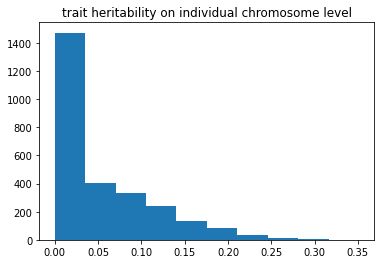

In [31]:
plt.hist(df_chr.loc[h_values_chr].values.flatten())
plt.title('trait heritability on individual chromosome level')

Text(0.5, 1.0, 'trait heritability SE on individual chromosome level')

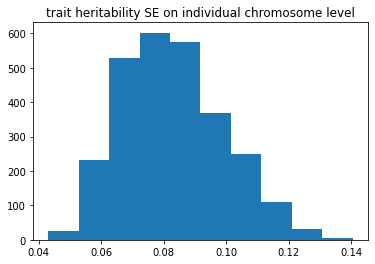

In [32]:
plt.hist(df_chr.loc[se_values_chr].values.flatten())
plt.title('trait heritability SE on individual chromosome level')

## By cell type

In [33]:
celltype_subdir = 'by_celltype'

#Location of annotation files
monocite_file_path = '/Users/maxreynolds/Desktop/KayhanLab/Adni/Genetic Data/adni_snps_monocyte_neuron_annotations/adni_bed.bim_to_bed_encode_monocyte_intersect.txt'
neuron_file_path = '/Users/maxreynolds/Desktop/KayhanLab/Adni/Genetic Data/adni_snps_monocyte_neuron_annotations/adni_bed.bim_to_bed_fullard_neun_intersect.txt'


df_monocyte = pd.read_csv(monocite_file_path, sep = '\t', header = None)
df_neuron = pd.read_csv(neuron_file_path, sep = '\t', header = None)

In [34]:
#Write snplist files based on annotations
df_monocyte[df_monocyte[6] != 0][3].to_csv(os.path.join(phen_dir, celltype_subdir, 'monocyte.snplist'), header = None, index=False)
df_neuron[df_neuron[6] != 0][3].to_csv(os.path.join(phen_dir, celltype_subdir, 'neuron.snplist'), header = None, index=False)
print(df_monocyte[df_monocyte[6] != 0][3].shape[0], 'monocyte SNPs')
print(df_neuron[df_neuron[6] != 0][3].shape[0], 'neuron SNPs')

16325 monocyte SNPs
9640 neuron SNPs


In [82]:
#make GRMs
os.system(gcta_path + " --bfile {} --maf .01 --make-grm --out {} --extract {} --thread-num 10".format(
              os.path.join(phen_dir, 'adni_bed'),
              os.path.join(phen_dir, celltype_subdir, 'adni_bed_monocyte'),
              os.path.join(phen_dir, celltype_subdir, 'monocyte.snplist')
          ))
os.system(gcta_path + " --bfile {} --maf .01 --make-grm --out {} --extract {} --thread-num 10".format(
              os.path.join(phen_dir, 'adni_bed'),
              os.path.join(phen_dir, celltype_subdir, 'adni_bed_neuron'),
              os.path.join(phen_dir, celltype_subdir, 'neuron.snplist')
          ))

0

In [83]:
#monocyte GREML, store in phen_dir/celltype_cubdir
for i_feature in imaging_features:
    os.system(gcta_path +  
          " --grm {} --pheno {} --covar {} --qcovar {} --reml --out {} --thread-num 10".format(
              os.path.join(phen_dir, celltype_subdir, 'adni_bed_monocyte'),
              os.path.join(phen_dir,  i_feature+'.phen'),
              os.path.join(phen_dir, 'sex.covar'),
              os.path.join(phen_dir, 'age.qcovar'),
              os.path.join(phen_dir, celltype_subdir, 'adni_bed_monocyte_'+i_feature)
          ))
#neuron greml
for i_feature in imaging_features:
    os.system(gcta_path +  
          " --grm {} --pheno {} --covar {} --qcovar {} --reml --out {} --thread-num 10".format(
              os.path.join(phen_dir, celltype_subdir, 'adni_bed_neuron'),
              os.path.join(phen_dir,  i_feature+'.phen'),
              os.path.join(phen_dir, 'sex.covar'),
              os.path.join(phen_dir, 'age.qcovar'),
              os.path.join(phen_dir, celltype_subdir, 'adni_bed_neuron_'+i_feature)
          ))

In [35]:
cell_types=['monocyte','neuron']
ind = []
for c in cell_types:
    ind.append(c+' VG/VP')
    ind.append(c+' SE')
df_cell = pd.DataFrame(index = ind, columns = imaging_features)
df_cell

,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,lh_fusiform_thickness,lh_inferiorparietal_thickness,lh_inferiortemporal_thickness,lh_isthmuscingulate_thickness,lh_lateraloccipital_thickness,...,lhCortexVol,rhCortexVol,CortexVol,lhCerebralWhiteMatterVol,rhCerebralWhiteMatterVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,SupraTentorialVol,SupraTentorialVolNotVent
monocyte VG/VP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
monocyte SE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neuron VG/VP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neuron SE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
for c in cell_types:
    for i in imaging_features:
        with open(os.path.join(phen_dir, celltype_subdir, 'adni_bed_'+c+'_'+i+'.log')) as f:
            lines = f.readlines()
            loi = [l for l in lines if 'V(G)/Vp' in l][0]
            cols = loi.split('\t')
            df_cell[i][c+' VG/VP'] = float(cols[1])
            df_cell[i][c+' SE'] = float(cols[2])
df_cell

,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,lh_fusiform_thickness,lh_inferiorparietal_thickness,lh_inferiortemporal_thickness,lh_isthmuscingulate_thickness,lh_lateraloccipital_thickness,...,lhCortexVol,rhCortexVol,CortexVol,lhCerebralWhiteMatterVol,rhCerebralWhiteMatterVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,SupraTentorialVol,SupraTentorialVolNotVent
monocyte VG/VP,0.053772,1e-06,0.02678,0.121577,1e-06,1e-06,1e-06,1e-06,1e-06,0.04218,...,0.223166,0.364052,0.301817,0.213486,0.138473,0.181374,1e-06,0.269649,0.313466,0.264987
monocyte SE,0.140659,0.175572,0.096597,0.159786,0.157311,0.087335,0.109716,0.078001,0.179306,0.095146,...,0.154042,0.172859,0.165691,0.161097,0.148942,0.155883,0.13893,0.160461,0.159668,0.161345
neuron VG/VP,0.013112,1e-06,0.023748,0.023971,0.036463,1e-06,1e-06,0.00971,1e-06,0.138384,...,0.173555,0.221314,0.199779,0.047171,0.096659,0.066602,1e-06,0.165067,0.205251,0.136818
neuron SE,0.096394,0.145852,0.091855,0.117586,0.150004,0.081919,0.098369,0.08136,0.155155,0.13633,...,0.132869,0.139963,0.136672,0.092726,0.121259,0.104983,0.128674,0.126662,0.127368,0.121096


In [37]:
df_cell.to_csv('heritability_scores_cell.csv')

In [38]:
h_values_cell = [x for x in df_cell.index if 'VG/VP' in x]
se_values_cell = [x for x in df_cell.index if 'VG/VP' not in x]

Text(0.5, 1.0, 'trait heritability on individual cell-type level')

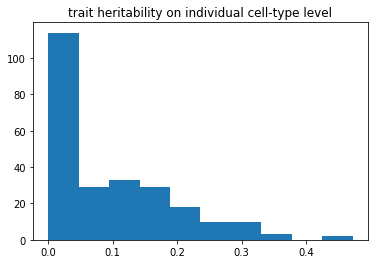

In [39]:
plt.hist(df_cell.loc[h_values_cell].values.flatten())
plt.title('trait heritability on individual cell-type level')

Text(0.5, 1.0, 'trait heritability SE on individual cell-type level')

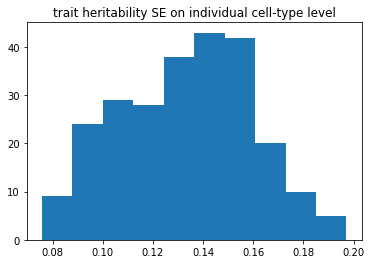

In [40]:
plt.hist(df_cell.loc[se_values_cell].values.flatten())
plt.title('trait heritability SE on individual cell-type level')

## By cell type and chromosome

In [97]:
#Make GRM for each chromosome in each celltype, store in phen_dir/celltype_subdir/chromosome_subidir
for ct in cell_types:
    for cr in range(1, n_chromosomes+1):
        print('Making GRM for ' + ct + ' chr' + str(cr))
        os.system(gcta_path + " --bfile {} --chr {} --maf .01 --make-grm --out {} --extract {} --thread-num 10".format(
                  os.path.join(phen_dir, 'adni_bed'),
                  cr,
                  os.path.join(phen_dir, celltype_subdir, chromosome_subdir, 'adni_bed_'+ct+'_chr'+str(cr)),
                  os.path.join(phen_dir, celltype_subdir, ct+'.snplist')
              ))

Making GRM for monocyte chr1
Making GRM for monocyte chr2
Making GRM for monocyte chr3
Making GRM for monocyte chr4
Making GRM for monocyte chr5
Making GRM for monocyte chr6
Making GRM for monocyte chr7
Making GRM for monocyte chr8
Making GRM for monocyte chr9
Making GRM for monocyte chr10
Making GRM for monocyte chr11
Making GRM for monocyte chr12
Making GRM for monocyte chr13
Making GRM for monocyte chr14
Making GRM for monocyte chr15
Making GRM for monocyte chr16
Making GRM for monocyte chr17
Making GRM for monocyte chr18
Making GRM for monocyte chr19
Making GRM for monocyte chr20
Making GRM for monocyte chr21
Making GRM for monocyte chr22
Making GRM for neuron chr1
Making GRM for neuron chr2
Making GRM for neuron chr3
Making GRM for neuron chr4
Making GRM for neuron chr5
Making GRM for neuron chr6
Making GRM for neuron chr7
Making GRM for neuron chr8
Making GRM for neuron chr9
Making GRM for neuron chr10
Making GRM for neuron chr11
Making GRM for neuron chr12
Making GRM for neuron 

In [100]:
for ct in cell_types:
    for cr in range(1, n_chromosomes+1):
        print('GREML for ' + ct + ' chromosome '+str(cr))
        for i_feature in imaging_features:
            os.system(gcta_path +  
                  " --grm {} --pheno {} --covar {} --qcovar {} --reml --out {} --thread-num 10".format(
                      os.path.join(phen_dir, celltype_subdir, chromosome_subdir, 'adni_bed_'+ct+'_chr'+str(cr)),
                      os.path.join(phen_dir,  i_feature+'.phen'),
                      os.path.join(phen_dir, 'sex.covar'),
                      os.path.join(phen_dir, 'age.qcovar'),
                      os.path.join(phen_dir, celltype_subdir, chromosome_subdir, 'adni_bed_'+ct+'_chr'+str(cr)+'_'+i_feature)
                  ))

GREML for monocyte chromosome 1
GREML for monocyte chromosome 2
GREML for monocyte chromosome 3
GREML for monocyte chromosome 4
GREML for monocyte chromosome 5
GREML for monocyte chromosome 6
GREML for monocyte chromosome 7
GREML for monocyte chromosome 8
GREML for monocyte chromosome 9
GREML for monocyte chromosome 10
GREML for monocyte chromosome 11
GREML for monocyte chromosome 12
GREML for monocyte chromosome 13
GREML for monocyte chromosome 14
GREML for monocyte chromosome 15
GREML for monocyte chromosome 16
GREML for monocyte chromosome 17
GREML for monocyte chromosome 18
GREML for monocyte chromosome 19
GREML for monocyte chromosome 20
GREML for monocyte chromosome 21
GREML for monocyte chromosome 22
GREML for neuron chromosome 1
GREML for neuron chromosome 2
GREML for neuron chromosome 3
GREML for neuron chromosome 4
GREML for neuron chromosome 5
GREML for neuron chromosome 6
GREML for neuron chromosome 7
GREML for neuron chromosome 8
GREML for neuron chromosome 9
GREML for neu

'/Users/maxreynolds/Desktop/KayhanLab/Adni/Heritability_Analysis/by_celltype/by_chromosome/adni_bed_neuron_chr22'

In [41]:
# cell_types=['monocyte','neuron']
ind = []
for ct in cell_types:
    for cr in range(1,n_chromosomes+1):
        ind.append(ct+'_chr'+str(cr)+' VG/VP')
        ind.append(ct+'_chr'+str(cr)+' SE')
df_cell_chromosome = pd.DataFrame(index = ind, columns = imaging_features)
df_cell_chromosome

,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,lh_fusiform_thickness,lh_inferiorparietal_thickness,lh_inferiortemporal_thickness,lh_isthmuscingulate_thickness,lh_lateraloccipital_thickness,...,lhCortexVol,rhCortexVol,CortexVol,lhCerebralWhiteMatterVol,rhCerebralWhiteMatterVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,SupraTentorialVol,SupraTentorialVolNotVent
monocyte_chr1 VG/VP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
monocyte_chr1 SE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
monocyte_chr2 VG/VP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
monocyte_chr2 SE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
monocyte_chr3 VG/VP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
neuron_chr20 SE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neuron_chr21 VG/VP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neuron_chr21 SE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neuron_chr22 VG/VP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
for ct in cell_types:
    for cr in range(1,n_chromosomes+1):
        for i in imaging_features:
            with open(os.path.join(phen_dir, celltype_subdir, chromosome_subdir, 'adni_bed_'+ct+'_chr'+str(cr)+'_'+i+'.log')) as f:
                lines = f.readlines()
                loi = [l for l in lines if 'V(G)/Vp' in l][0]
                cols = loi.split('\t')
                df_cell_chromosome[i][ct+'_chr'+str(cr)+' VG/VP'] = float(cols[1])
                df_cell_chromosome[i][ct+'_chr'+str(cr)+' SE'] = float(cols[2])
df_cell_chromosome

,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,lh_fusiform_thickness,lh_inferiorparietal_thickness,lh_inferiortemporal_thickness,lh_isthmuscingulate_thickness,lh_lateraloccipital_thickness,...,lhCortexVol,rhCortexVol,CortexVol,lhCerebralWhiteMatterVol,rhCerebralWhiteMatterVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,SupraTentorialVol,SupraTentorialVolNotVent
monocyte_chr1 VG/VP,1e-06,1e-06,1e-06,0.053174,1e-06,0.011376,1e-06,1e-06,1e-06,0.072719,...,0.04904,0.081419,0.067646,0.005806,0.006157,0.005648,1e-06,0.067845,0.060408,0.026555
monocyte_chr1 SE,0.055728,0.055731,0.049178,0.057408,0.059409,0.052599,0.05649,0.04975,0.057405,0.052331,...,0.053479,0.057733,0.055966,0.047211,0.050282,0.048435,0.059985,0.055698,0.052096,0.050402
monocyte_chr2 VG/VP,1e-06,0.04482,0.013271,0.028422,0.062831,0.027051,1e-06,0.000857,0.011865,0.00551,...,0.061533,0.044083,0.058876,0.026275,0.015861,0.024045,0.004058,0.06569,0.055015,0.047455
monocyte_chr2 SE,0.044504,0.054512,0.043856,0.050415,0.055164,0.048641,0.048312,0.039245,0.050501,0.040526,...,0.050605,0.048612,0.05043,0.04455,0.043471,0.044501,0.052165,0.050034,0.04453,0.047088
monocyte_chr3 VG/VP,0.064784,1e-06,0.040807,0.010841,1e-06,0.016764,1e-06,1e-06,0.007363,0.006239,...,0.071661,0.065405,0.069806,0.039274,0.027625,0.034699,1e-06,0.059653,0.094325,0.069715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
neuron_chr20 SE,0.016841,0.017463,0.017407,0.015987,0.018433,0.017265,0.019014,0.016876,0.019108,0.016153,...,0.016028,0.016648,0.015732,0.016332,0.015544,0.015915,0.019964,0.015847,0.014518,0.015491
neuron_chr21 VG/VP,0.018188,0.015533,1e-06,1e-06,1e-06,0.007269,1e-06,0.002806,1e-06,0.015532,...,1e-06,1e-06,1e-06,0.026992,0.032812,0.031021,0.025234,2e-06,0.018601,0.02322
neuron_chr21 SE,0.022855,0.022942,0.021525,0.019057,0.022134,0.021074,0.0204,0.019144,0.019035,0.020785,...,0.019479,0.019484,0.019456,0.023845,0.024701,0.024432,0.02402,0.019653,0.022651,0.023509
neuron_chr22 VG/VP,1e-06,1e-06,1e-06,0.023037,0.002086,0.006498,1e-06,0.005934,0.017232,0.007249,...,0.006436,0.008913,0.008316,0.004258,0.004473,0.003741,1e-06,0.00827,0.012539,0.003412


In [43]:
df_cell_chromosome.to_csv('heritability_scores_cell_chr.csv')

In [44]:
h_values_cell_chr = [x for x in df_cell_chromosome.index if 'VG/VP' in x]
se_values_cell_chr = [x for x in df_cell_chromosome.index if 'VG/VP' not in x]

Text(0.5, 1.0, 'trait heritability on individual cell-type and chromosome level')

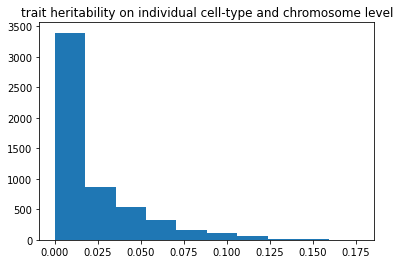

In [47]:
plt.hist(df_cell_chromosome.loc[h_values_cell_chr].values.flatten())
plt.title('trait heritability on individual cell-type and chromosome level')

Text(0.5, 1.0, 'trait heritability SE on individual cell-type and chromosome level')

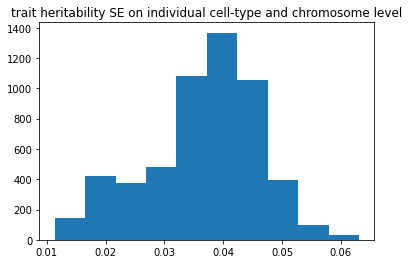

In [48]:
plt.hist(df_cell_chromosome.loc[se_values_cell_chr].values.flatten())
plt.title('trait heritability SE on individual cell-type and chromosome level')

Text(0.06, 0.5, 'Number of phenotypes')

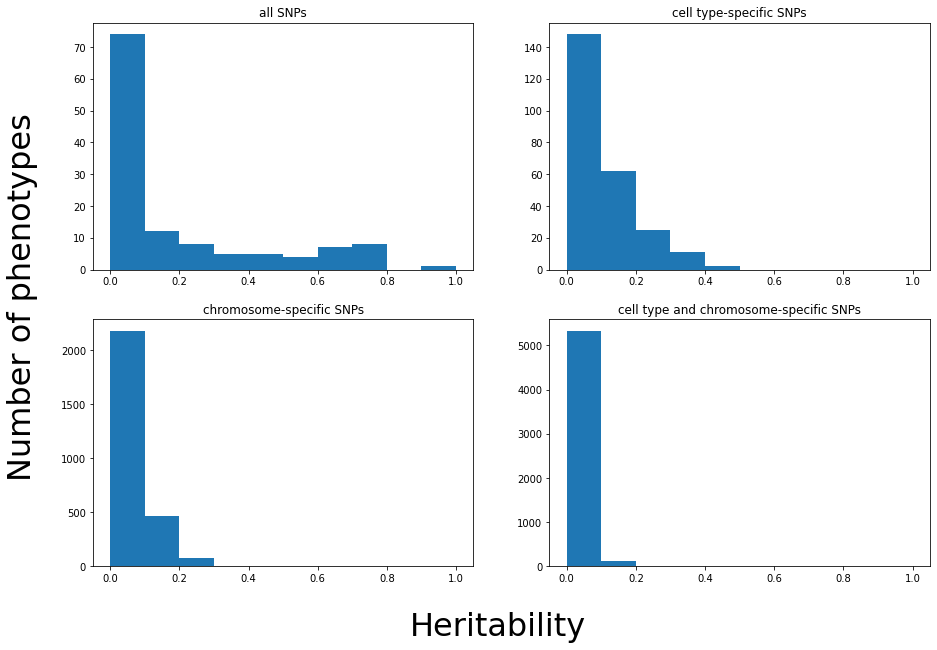

In [97]:


fig = plt.figure(figsize = (15,10))
# ax = fig.add_subplot(111)
ax1 = fig.add_subplot(2,2,1)
ax1.hist(df_heritability.values[0], bins=np.linspace(0,1,11))
ax1.set_title('all SNPs')
ax2 = fig.add_subplot(2,2,2)
ax2.hist(df_cell.loc[h_values_cell].values.flatten(), bins=np.linspace(0,1,11))
ax2.set_title('cell type-specific SNPs')
ax3 = fig.add_subplot(2,2,3)
ax3.hist(df_chr.loc[h_values_chr].values.flatten(), bins=np.linspace(0,1,11))
ax3.set_title('chromosome-specific SNPs')
ax4 = fig.add_subplot(2,2,4)
ax4.hist(df_cell_chromosome.loc[h_values_cell_chr].values.flatten(), bins=np.linspace(0,1,11))
ax4.set_title('cell type and chromosome-specific SNPs')

fig.text(0.5, 0.04, 'Heritability', ha='center', va='center', size = 32)
fig.text(0.06, 0.5, 'Number of phenotypes', ha='center', va='center', rotation='vertical', size = 32)